### Hotel Review Classifier (working title)

*Flatiron School Data Science Bootcamp*

Captsone Project - NLP Sentiment/Ratings Analysis

Anna D'Angela | [annaadangela@gmail.com](mailo:annaadangela@gmail.com)

[Return to GitHub repo](https://github.com/anna-dang/mod05-capstone)


# TODO

- update url function to process mid range pages numbers (if "-or(any # of digits)-), get that, extract number, convert to in and use as start number in range
- upgrade plot design
- change function for lowercase df titles

In [1]:
# Auto - reload custom function library
%load_ext autoreload
%autoreload 2

In [3]:
# Import libraries
from re import compile, split
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep, time

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Custom functions
from capstone_functions import collection_functions as cf

# Data Collection

The Trip Advisor home page of selected hotels will be stored seperately as a text file to keep this notebook tidy.
I will scrape 1000 reviews from 10 hotels in the Denver, Colorado metro area. I manaually confirmed the hotels had at least that many reviews as I collected their urls.

How I decided which hotels: 

Mid-range hotels with a standard average nightly rate under $200/night (at time of scrape, January 2021). I selected nighly rated properties and low rated to try and gather a balanced distribution of rating classes.

Due to built it wait times for to avoid Selenium TimeOut Exceptions, long runtimes observed:


### Scrape website

In [120]:
# Import hotel homepage extensions as a list 
with open("./data/denver_urls.txt", "r") as scrape_1_urls:
    hotel_homepage_urls = scrape_1_urls.read().splitlines()

# Remove white space caused by 'splitlines'
hotel_homepage_urls = [i for i in hotel_homepage_urls if i]

# Check format and length
print(len(hotel_homepage_urls))
hotel_homepage_urls[:3]

17


'/Hotel_Review-g33388-d6577001-Reviews-The_Crawford_Hotel-Denver_Colorado.html'

In [107]:
# Create a base df to populate with hotel information
base_df = pd.DataFrame(columns = ['Location', 'Hotel', 'Title', 'Review', 'Rating']) 
base_df

,Location,Hotel,Title,Review,Rating


In [114]:
# Iterate through each hotel in list, record runtimes
start_time = time()

for i, hotel_url in enumerate(hotel_homepage_urls):
    
    print("--- Hotel ", i+1, " ---")
    
    start_run = time()
    
    # Scrape each hotel for specified number of pages
    hotel_df = cf.scrape_hotel(hotel_url, n=240)
    
    # Add to base df
    base_df = pd.concat([base_df, hotel_df])
    
    # Calculation runtime
    run_time = round((time() - start_run)/60, 2)
    
    print(f"--- Run {i+1} complete:", run_time, "minutes ---")
    
    # Avoid being booted
    sleep(3)

# Total run time
full_run_time = time() - start_time

--- Hotel  1  ---
click
page 1
click
page 2
click
page 3
click
page 4
click
page 5
click
page 6
click
page 7
click
page 8
click
page 9
click
page 10
click
page 11
click
page 12
click
page 13
click
page 14
click
page 15
click
page 16
click
page 17
click
page 18
click
page 19
click
page 20
click
page 21
click
page 22
click
page 23
click
page 24
click
page 25
click
page 26
click
page 27
click
page 28
click
page 29
click
page 30
click
page 31
click
page 32
click
page 33
click
page 34
click
page 35
click
page 36
click
page 37
click
page 38
click
page 39
click
page 40
click
page 41
click
page 42
click
page 43
click
page 44
click
page 45
click
page 46
click
page 47
click
page 48
click
page 49
click
page 50
click
page 51
click
page 52
click
page 53
click
page 54
click
page 55
click
page 56
click
page 57
click
page 58
click
page 59
click
page 60
click
page 61
click
page 62
click
page 63
click
page 64
click
page 65
click
page 66
click
page 67
click
page 68
click
page 69
click
page 70
click
page 

In [117]:
# Total scrape runtime
print(round(full_run_time/60, 2), "minutes")

18.87 minutes


### Check

In [123]:
# Rename to hold a backup (so don't accidentally save over)
df = base_df

# Check full populated df
df.head()

,Location,Hotel,Title,Review,Rating
0,"Denver, CO",The Crawford Hotel,WHAT A STAY!,The Crawford Hotel was seriously the most uniq...,5
1,"Denver, CO",The Crawford Hotel,Anniversary Staycation,Husband and I booked the B&B package for our 3...,4
2,"Denver, CO",The Crawford Hotel,Birthday Getaway,"We traveled from Emeryville, CA to Denver on t...",5
3,"Denver, CO",The Crawford Hotel,A perfect staycation during the pandemic (and ...,We stayed at The Crawford the weekend before T...,5
4,"Denver, CO",The Crawford Hotel,Incredible service - above and beyond!,Thoroughly enjoyed my stay at The Crawford! We...,5


In [124]:
df.shape

(1200, 5)

In [125]:
# Preview review composition (ensure that they have been fully expanded)
for r in df['Review'][0:5]:
    print(r, "\n")

The Crawford Hotel was seriously the most unique and beautiful hotels I have ever stayed in. My husband and I decided to stay here for our honeymoon and it certainly did not disappoint. From guest services answering our every need and the Tesla valet courtesy car service especially with Jamel and Riley as our drivers was amazing!!!! I can’t really say anything bad about this hotel whatsoever. Super quiet, super cozy, and outstandingly beautiful and romantic! 

Husband and I booked the B&B package for our 31st anniversary.  The hotel staff were warm, friendly, and professional.  Also I was able to update my reservation after a date mixup.  As mentioned by others in several reviews the hotel amenities are great and the rooms are beautifully decorated.  The experience overall was great with the exception of a few things:  1.  Being awaken early AM to loud noises which sounded like large doors being closed and metal clanging2.  Couldn’t figure out how to order breakfast from Snooze as it w

In [126]:
# Check df
print("Reviews:", df.shape[0])
print("Missing values?", df.isna().sum().sum())
print("Hotels:", df['Hotel'].nunique())
list(df['Hotel'].unique())

Reviews: 1200
Missing values? 0
Hotels: 1


['The Crawford Hotel']

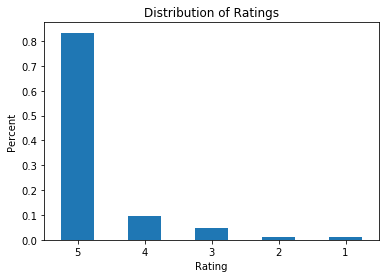

In [127]:
# Examine rating distribution
df['Rating'].value_counts(normalize=True).plot(kind='bar', rot = 0);
plt.title("Distribution of Ratings")
plt.xlabel('Rating')
plt.ylabel("Percent")
plt.show()

### Save data

In [128]:
# Save
df.to_csv("./data/test_scrape_3.csv", index=False)

In [129]:
# Check load
check_df = pd.read_csv("./data/test_scrape_3.csv")
check_df.head()

,Location,Hotel,Title,Review,Rating
0,"Denver, CO",The Crawford Hotel,WHAT A STAY!,The Crawford Hotel was seriously the most uniq...,5
1,"Denver, CO",The Crawford Hotel,Anniversary Staycation,Husband and I booked the B&B package for our 3...,4
2,"Denver, CO",The Crawford Hotel,Birthday Getaway,"We traveled from Emeryville, CA to Denver on t...",5
3,"Denver, CO",The Crawford Hotel,A perfect staycation during the pandemic (and ...,We stayed at The Crawford the weekend before T...,5
4,"Denver, CO",The Crawford Hotel,Incredible service - above and beyond!,Thoroughly enjoyed my stay at The Crawford! We...,5


In [130]:
# Looks good!
check_df.shape

(1200, 5)

### Concat many scrapes:


- scrape_3 : 1200 from URL 4,
        
        'The Crawford Hotel'
        
- scrape_4 : 2000 from URL 5 - 6, 
    
         'Baymont by Wyndham Denver International Airport',
         'Grand Hyatt Denver Downtown', cruisin'! green light
         
- scrape_5: 3995 reviews from URL 7 - 10, 

         'Warwick Denver Hotel',
         'The Westin Denver International Airport',
         'Hyatt Place Denver/Cherry Creek',
         'Microtel Inn & Suites by Wyndham Denver'

- scrape_6: 3930 reviews from URL 1-4, (so there may be duplicates!)
    
         'Best Western Plus Denver International Airport Inn & Suites',
         'Clarion Hotel Denver Central',
         'La Quinta Inn & Suites by Wyndham Denver Airport Dia',
         'The Crawford Hotel'
         
- scrape_8: 3000 from url 11 - 13,

        'Hilton Denver City Center'
        'Embassy Suites by Hilton Denver International Airport',
        'The Oxford Hotel'

- scrape_9: 9995 from URL 14 - 18,

        'Hyatt Regency Denver At Colorado Convention Center',
        'Baymont by Wyndham Denver International Airport',
        'The Curtis Denver - a DoubleTree by Hilton Hotel',
        'Sheraton Denver Downtown Hotel',
        'DoubleTree by Hilton Hotel Denver'
        
- scrape_10: 1196 from URL 18-25
        
        'Quality Inn & Suites Denver International Airport',
         'Comfort Inn & Suites',
         'La Quinta Inn by Wyndham Denver Central',
         '11th Avenue Hostel',
         'Hampton Inn & Suites Denver Downtown',
         'Sheraton Denver Downtown Hotel',
         'Aloft Denver Downtown',
         'Kimpton Hotel Monaco Denver'
    

In [4]:
# Load all 
df_3 = pd.read_csv("./data/scrape_3.csv")
df_4 = pd.read_csv("./data/scrape_4.csv")
df_5 = pd.read_csv("./data/scrape_5.csv")
df_6 = pd.read_csv("./data/scrape_6.csv")
df_8 = pd.read_csv("./data/scrape_8.csv")
df_9 = pd.read_csv("./data/scrape_9.csv")
df_10 = pd.read_csv("./data/scrape_10.csv")

In [6]:
# Check sizes
frames = [df_9, df_8, df_6, df_5, df_4, df_3, df_10]

for i in frames:
    print(i.shape[0])

9995
3000
3930
3995
2000
1200
1196


In [7]:
# Merge
full_df = pd.concat(frames)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316 entries, 0 to 1195
Data columns (total 5 columns):
Location    25316 non-null object
Hotel       25316 non-null object
Title       25315 non-null object
Review      25316 non-null object
Rating      25316 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
# Ensure all hotels represented (17)
print(full_df['Hotel'].nunique())
full_df['Hotel'].unique()

24


array(['Hyatt Regency Denver At Colorado Convention Center',
       'Baymont by Wyndham Denver International Airport',
       'The Curtis Denver - a DoubleTree by Hilton Hotel',
       'Sheraton Denver Downtown Hotel',
       'DoubleTree by Hilton Hotel Denver',
       'Embassy Suites by Hilton Denver International Airport',
       'The Oxford Hotel', 'Hilton Denver City Center',
       'Best Western Plus Denver International Airport Inn & Suites',
       'Clarion Hotel Denver Central',
       'La Quinta Inn & Suites by Wyndham Denver Airport Dia',
       'The Crawford Hotel', 'Warwick Denver Hotel',
       'The Westin Denver International Airport',
       'Hyatt Place Denver/Cherry Creek',
       'Microtel Inn & Suites by Wyndham Denver',
       'Grand Hyatt Denver Downtown',
       'Quality Inn & Suites Denver International Airport',
       'Comfort Inn & Suites', 'La Quinta Inn by Wyndham Denver Central',
       '11th Avenue Hostel', 'Hampton Inn & Suites Denver Downtown',
       'A

In [9]:
# Duplicates?
print("Duplicates:", full_df.duplicated().sum())
clean_df = full_df.drop_duplicates()
print("Duplicate check:", clean_df.duplicated().sum())

# NaN?
print("\n NaN Check:\n", full_df.isna().sum())
clean_df = clean_df.dropna()

Duplicates: 2752
Duplicate check: 0

 NaN Check:
 Location    0
Hotel       0
Title       1
Review      0
Rating      0
dtype: int64


In [10]:
# Shape / NaN check
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22563 entries, 0 to 1190
Data columns (total 5 columns):
Location    22563 non-null object
Hotel       22563 non-null object
Title       22563 non-null object
Review      22563 non-null object
Rating      22563 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


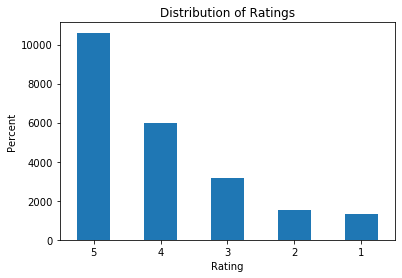

In [11]:
# Examine rating distribution
clean_df['Rating'].value_counts().plot(kind='bar', rot = 0);
plt.title("Distribution of Ratings")
plt.xlabel('Rating')
plt.ylabel("Percent")
plt.show()

### Export final data

In [12]:
# Save as one file
#clean_df.to_csv("./data/clean_scrape.csv", index=False)

In [13]:
# Check load
total_df = pd.read_csv("./data/clean_scrape.csv")
print(total_df.shape)
total_df.head()

(22563, 5)


,Location,Hotel,Title,Review,Rating
0,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Great View,Easy check in and check out process using the ...,5
1,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Clean and Comfortable,We needed a last-minute place to stay in Denve...,5
2,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Excellent Staff & Service,We love Hyatt hotels and have had many great e...,5
3,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Trip to Denver - a Hallmark Christmas,"I have never encountered such helpful, friendl...",5
4,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Our 'see downtown' hotel,"We love it here! Great service, they usually r...",5


[Continue to data analysis]("../NLP_processing.ipynb")